# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [3]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('../data/yelp.csv')
yelp.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0


In [4]:
yelp.sample(n=3, random_state=1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0
3850,hGQsnkndreW7b26XC2HVRA,2010-03-17,ScnMz8HfacbcMtZ7lFbo-Q,4,My husband & I have been going to one Zipp's o...,review,RJX1E5_xwd5x15TYFOYv1g,0,1,0
4962,_TekkyyFeX_8MBepPIxuTg,2012-08-09,IwujucKW_I4Hd-D47N3jWQ,5,Perfect place for a hot summer day. Amazing p...,review,ngU1vdwjT2lGOsdTq1JK5A,0,1,0


### SEC: Extra items from prior classes to practice exploring the data

In [16]:
#SEC: check to see whether there are null values in the data
yelp.groupby(yelp.stars.isnull()).count()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
stars,,,,,,,,,,
False,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000


In [13]:
#SEC: verify the data types
yelp.dtypes

business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
dtype: object

In [18]:
#SEC: explore the numeric data in the .csv
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [100]:
#SEC: Count how many rows for each of the star classifications (1 thru 5)
yelp.groupby(['stars']).business_id.count()

#SEC: this was another method I used, although it gave me counts for all three features (which wasn't quite what I was looking for)
    #yelp.groupby(['stars']).agg(['mean', 'count']) 
# resource = https://stackoverflow.com/questions/19384532/how-to-count-number-of-rows-in-a-group-in-pandas-group-by-object
#1=7%, 2=9%, 3=15%, 4=35%, 5=33%


stars
1     749
2     927
3    1461
4    3526
5    3337
Name: business_id, dtype: int64

## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [23]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
with open('../data/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]

In [24]:
# show the first review
type(data)

list

In [28]:
# show the first review
data[0:1]

#SEC: note that this is the "first" as in first record, not "first" review as in earliest review.
    # see the end of this section for "first" = earliest 

[{u'business_id': u'9yKzy9PApeiPPOUJEtnvkg',
  u'date': u'2011-01-26',
  u'review_id': u'fWKvX83p0-ka4JS3dc6E5A',
  u'stars': 5,
  u'text': u'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever 

In [30]:
# convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame.from_dict(data)
df.head(3)

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}"
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}"


In [31]:
df.sample(n=3, random_state=1)

,business_id,date,review_id,stars,text,type,user_id,votes
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,"{u'funny': 0, u'useful': 2, u'cool': 0}"
3850,hGQsnkndreW7b26XC2HVRA,2010-03-17,ScnMz8HfacbcMtZ7lFbo-Q,4,My husband & I have been going to one Zipp's o...,review,RJX1E5_xwd5x15TYFOYv1g,"{u'funny': 0, u'useful': 1, u'cool': 0}"
4962,_TekkyyFeX_8MBepPIxuTg,2012-08-09,IwujucKW_I4Hd-D47N3jWQ,5,Perfect place for a hot summer day. Amazing p...,review,ngU1vdwjT2lGOsdTq1JK5A,"{u'funny': 0, u'useful': 1, u'cool': 0}"


In [36]:
# add DataFrame columns for cool, useful, and funny

df['cool'] = df.votes.map(lambda x : x['cool'])
df['useful'] = df.votes.map(lambda x: x['useful'])
df['funny'] = df.votes.map(lambda x: x['funny'])
df.sample(n=3, random_state=1)

,business_id,date,review_id,stars,text,type,user_id,votes,cool,useful,funny
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,"{u'funny': 0, u'useful': 2, u'cool': 0}",0,2,0
3850,hGQsnkndreW7b26XC2HVRA,2010-03-17,ScnMz8HfacbcMtZ7lFbo-Q,4,My husband & I have been going to one Zipp's o...,review,RJX1E5_xwd5x15TYFOYv1g,"{u'funny': 0, u'useful': 1, u'cool': 0}",0,1,0
4962,_TekkyyFeX_8MBepPIxuTg,2012-08-09,IwujucKW_I4Hd-D47N3jWQ,5,Perfect place for a hot summer day. Amazing p...,review,ngU1vdwjT2lGOsdTq1JK5A,"{u'funny': 0, u'useful': 1, u'cool': 0}",0,1,0


In [37]:
# another way to get the cool, funny, useful:
pd.DataFrame.from_records(df.votes).head()

,cool,funny,useful
0,2,0,5
1,0,0,0
2,0,0,1
3,1,0,2
4,0,0,0


In [38]:
# Concat the above DataFrame to the df
df_temp = pd.DataFrame.from_records(df.votes)
df = pd.concat([df, df_temp], axis=1)
df.head(3)

,business_id,date,review_id,stars,text,type,user_id,votes,cool,useful,funny,cool,funny,useful
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}",2,5,0,2,0,5
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}",0,1,0,0,0,1


In [39]:
# drop the votes column and then display the head
df.drop('votes', axis=1).sample(n=3, random_state=1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,cool,funny,useful
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0,0,0,2
3850,hGQsnkndreW7b26XC2HVRA,2010-03-17,ScnMz8HfacbcMtZ7lFbo-Q,4,My husband & I have been going to one Zipp's o...,review,RJX1E5_xwd5x15TYFOYv1g,0,1,0,0,0,1
4962,_TekkyyFeX_8MBepPIxuTg,2012-08-09,IwujucKW_I4Hd-D47N3jWQ,5,Perfect place for a hot summer day. Amazing p...,review,ngU1vdwjT2lGOsdTq1JK5A,0,1,0,0,0,1


In [120]:
#SEC: per note above, trying to pull the "first" review by earliest date.
# df.date.min() # blanket sort of all records to pull earliest review
df.sort_values('date').head(1)
# df.sort_values('date').groupby(['business_id']).first() # this selects earliest review by business. useful for later...


,business_id,date,review_id,stars,text,type,user_id,votes,cool,funny,useful
7945,B8ujMtvvpHyEQ2r_QlAT2w,2005-04-18,kwxmuNqc5EcaErD2zYpoKw,5,"Wood fired pizzas, scrumptious pasta dishes an...",review,6VZNGc2h2Bn-uyuEXgOt5g,"{u'funny': 0, u'useful': 3, u'cool': 5}",5,0,3


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [45]:
#SEC: because I got screwy stuff from above I started from scratch

import json
with open('../data/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]
df = pd.DataFrame.from_dict(data)
df_temp = pd.DataFrame.from_records(df.votes)
df = pd.concat([df, df_temp], axis=1)
df.drop('votes', axis=1).sample(n=3, random_state=1)



,business_id,date,review_id,stars,text,type,user_id,cool,funny,useful
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,0,2
3850,hGQsnkndreW7b26XC2HVRA,2010-03-17,ScnMz8HfacbcMtZ7lFbo-Q,4,My husband & I have been going to one Zipp's o...,review,RJX1E5_xwd5x15TYFOYv1g,0,0,1
4962,_TekkyyFeX_8MBepPIxuTg,2012-08-09,IwujucKW_I4Hd-D47N3jWQ,5,Perfect place for a hot summer day. Amazing p...,review,ngU1vdwjT2lGOsdTq1JK5A,0,0,1


In [46]:
# treat stars as a categorical variable and look for differences between groups 
# by comparing the means of the groups
cool_mean = df.groupby(['stars']).cool.mean()
useful_mean = df.groupby(['stars']).useful.mean()
funny_mean = df.groupby(['stars']).funny.mean()
df_mean_concat = pd.concat([cool_mean, funny_mean, useful_mean], axis=1)
df_mean_concat
#SEC: I got this above when I tried to get row counts by 'stars'

,cool,funny,useful
stars,,,
1,0.576769,1.056075,1.604806
2,0.719525,0.875944,1.563107
3,0.788501,0.694730,1.306639
4,0.954623,0.670448,1.395916
5,0.944261,0.608631,1.381780


In [53]:
# easier way to do this
df.groupby(['stars']).mean()

,cool,funny,useful
stars,,,
1,0.576769,1.056075,1.604806
2,0.719525,0.875944,1.563107
3,0.788501,0.694730,1.306639
4,0.954623,0.670448,1.395916
5,0.944261,0.608631,1.381780


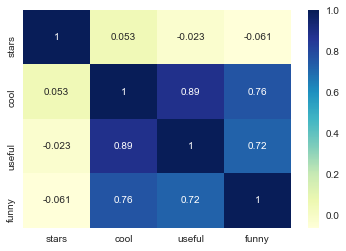

In [62]:
# display a correlation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
sns.heatmap(yelp.corr(), cmap="YlGnBu", annot=True)
#SEC: added some formatting per this reference http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [56]:
yelp.corr()

,stars,cool,useful,funny
stars,1.000000,0.052555,-0.023479,-0.061306
cool,0.052555,1.000000,0.887102,0.764342
useful,-0.023479,0.887102,1.000000,0.723406
funny,-0.061306,0.764342,0.723406,1.000000


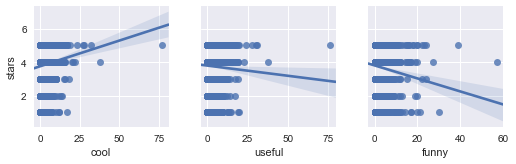

In [57]:
# display multiple scatter plots (cool, useful, funny) with linear regression line
# To use seaborn for multiple plots:
import seaborn as sns; sns.set(color_codes=True)
feature_cols = ['cool', 'useful', 'funny']
sns.pairplot(yelp, x_vars=feature_cols, y_vars='stars', kind='reg')

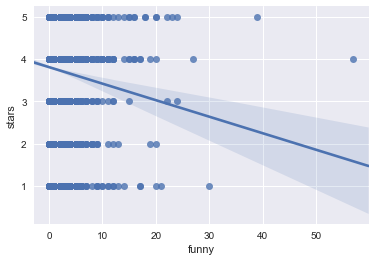

In [63]:
# To use seaborn for single plots:
sns.regplot(x='funny', y="stars", data=yelp)

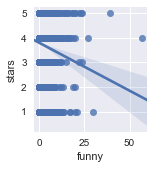

In [64]:
# To use seaborn for single plots:
sns.pairplot(yelp, x_vars='funny', y_vars='stars', kind='reg')

In [65]:
# To use matplotlib + scikit LinearRegression to achive the same
x = yelp.funny.values.reshape(-1, 1) 
y = yelp.stars.values

In [66]:
# To use matplotlib + scikit LinearRegression to achive the same
from sklearn.linear_model import LinearRegression as LinReg
reg = LinReg()    # Instantiate the LinearRegression()
reg.fit(x, y)
y_preds = reg.predict(x)

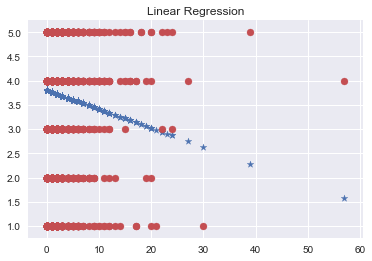

In [68]:
# To use matplotlib + scikit LinearRegression to achive the same for single plot
import matplotlib.pyplot as plt
plt.scatter(x = x, y = y_preds, marker='*',c = 'b')
plt.scatter(x = x, y = y, c = 'r')
plt.title("Linear Regression")

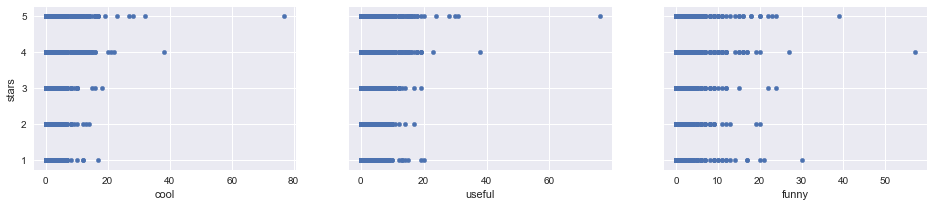

In [69]:
# multiple scatter plots in matplotlib, but can not get regression on the same plot
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)  # 1 rwo, 4 cols
for i, feature in enumerate(feature_cols):
    yelp.plot(kind='scatter', x=feature, y='stars', ax=axs[i], figsize=(16, 3))
#     plt.scatter(x = i, y = y_preds, marker='+',c = 'b')
#     plt.scatter(x = i, y = y, c = 'r')

## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [70]:
feature_columns = ['cool', 'useful', 'funny']
X = yelp[feature_columns]
y = yelp.stars

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [71]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
linreg.intercept_, linreg.coef_

(3.8398947927830829, array([ 0.27435947, -0.14745239, -0.13567449]))

In [73]:
zip(feature_cols, linreg.coef_)

[('cool', 0.27435946858853061),
 ('useful', -0.14745239099401478),
 ('funny', -0.13567449053706179)]

##### SEC: If you look at the results of "df.groupby(['stars']).mean()" and think it through it makes some sense.  
* 2/3 of the star data is either 4 or 5, so the 3.84 intercept makes sense.  
* a (slightly) negative correlation of funny makes sense, since most people tend to enjoy the brutal snarky reviews.  
* the positive correlation with "cool" may not be as useful, since it seems that users don't use that rating as much...?  
* the negative correlation with "useful" isn't as intuitive, except those reviews might be qualitatively unhelpful. I would want to explore other factors (perhaps a word count of the 'text' field?... or after later lessons, word mappings or word frequencies?)



for more information on Yelp ratings, https://www.quora.com/How-did-Yelp-decide-on-useful-funny-and-cool-as-the-qualitative-dimensions-by-which-to-rate-a-review

## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [76]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np
#SEC: note that the cross_validation module is being deprecated in favor of using the model_selection module. 
# Here's the documentation on model_selection http://scikit-learn.org/stable/model_selection.html
# and the documentation on train test split using that module http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

C:\Users\schri\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [77]:
# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = yelp[feature_cols]
    y = yelp.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X, y)                  # fit the model using whole set
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

def train_test_rmse_curious(feature_cols):
    X = yelp[feature_cols]
    y = yelp.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)       # fit the model using training set
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [78]:
# calculate RMSE with all three features
train_test_split(X, y, random_state=123)
print('Whole set to fit the model:', train_test_rmse(['cool','useful','funny']))
print('Training set to fit the model:', train_test_rmse_curious(['cool','useful','funny']))

('Whole set to fit the model:', 1.1727746541534982)
('Training set to fit the model:', 1.1733686274194506)


## Task 6

Try removing some of the features and see if the RMSE improves.

In [79]:
print('Whole set:', train_test_rmse(['funny','useful']))
print('Whole set:', train_test_rmse(['useful']))
print('Training set:', train_test_rmse_curious(['funny','useful']))
print('Training set:', train_test_rmse_curious(['useful']))

('Whole set:', 1.2004814572247986)
('Whole set:', 1.2013802225121155)
('Training set:', 1.2007011358855331)
('Training set:', 1.2014348862473769)


## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [80]:
# SEC: to my point above, the five star reviews may be deemed less useful due to a qualitative aspect 
    # (length, or users look for specific details about food, atmosphere, etc) length of review seems easiest to capture.
yelp.type.unique()
type(yelp.text)
print('length of review: ', len(yelp.iloc[3]['text']))
print('length of review: ', len(yelp.iloc[500]['text']))
yelp['length'] = yelp.text.str.len()


yelp.length

('length of review: ', 419)
('length of review: ', 864)


0        889
1       1345
2         76
3        419
4        469
5       2094
6       1565
7        274
8        349
9        186
10       298
11       321
12       433
13       593
14      1206
15       705
16      1469
17       363
18      1161
19       726
20       565
21       104
22       148
23       594
24       294
25      1012
26       921
27       550
28      1011
29       225
        ... 
9970     432
9971     318
9972     411
9973     353
9974     473
9975    1015
9976     465
9977    2919
9978     493
9979     244
9980     393
9981     885
9982     240
9983     861
9984    1673
9985      68
9986     647
9987     200
9988     496
9989      49
9990     263
9991     908
9992    1326
9993     426
9994    1968
9995     668
9996     881
9997    1425
9998     880
9999     461
Name: length, Length: 10000, dtype: int64

In [81]:
yelp.sample(n=3, random_state=1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0,296
3850,hGQsnkndreW7b26XC2HVRA,2010-03-17,ScnMz8HfacbcMtZ7lFbo-Q,4,My husband & I have been going to one Zipp's o...,review,RJX1E5_xwd5x15TYFOYv1g,0,1,0,801
4962,_TekkyyFeX_8MBepPIxuTg,2012-08-09,IwujucKW_I4Hd-D47N3jWQ,5,Perfect place for a hot summer day. Amazing p...,review,ngU1vdwjT2lGOsdTq1JK5A,0,1,0,137


In [82]:
# new feature:
new_feature_columns = ['cool', 'useful', 'funny', 'length']

In [83]:
# new features: 
X_2 = yelp[new_feature_columns]
y = yelp.stars

In [84]:
# add new features to the model and calculate RMSE
train_test_split(X_2, y, random_state=123)
print('Whole set to fit the model:', train_test_rmse(['cool','useful','funny','length']))

('Whole set to fit the model:', 1.1660975100739146)


#### SEC: the results suggest the length of the text [review] correlates to higher ratings.  

In [90]:
new_feature_columns_3 = ['length']
X_3 = yelp[new_feature_columns_3]
y = yelp.stars
train_test_split(X_2, y, random_state=123)
print('Whole set to fit the model:', train_test_rmse(['length']))

('Whole set to fit the model:', 1.1937993128671136)


In [97]:
new_feature_columns_4 = ['useful','length']
X_4 = yelp[new_feature_columns_4]
y = yelp.stars
train_test_split(X_2, y, random_state=123)

[      cool  useful  funny  length
 9174     1       2      1    1062
 4379     1       2      1     499
 541      0       0      0     611
 7251     0       0      0     305
 1135     7       8     10     633
 9978     0       1      0     493
 3536     2       1      1     508
 5891     0       0      0     851
 3906     3       3      2     670
 4348     0       1      0      11
 889      0       0      0     145
 3927     0       0      0     697
 2017     1       1      0     477
 2497     0       0      0     268
 3779     2       1      0    1164
 7652     2       3      1    1000
 7513     1       2      1     117
 8765     0       0      0     294
 5234     0       0      0     320
 2995     0       1      0    1215
 2350     1       1      1    1591
 466      0       0      0     236
 5758     2       3      1     596
 1299     0       0      0     173
 9717     0       0      0     166
 9256     0       0      0     316
 4109     0       1      0    3581
 2092     0       0 

In [98]:
print('Whole set to fit the model:', train_test_rmse(['cool']))
print('Whole set to fit the model:', train_test_rmse(['useful']))
print('Whole set to fit the model:', train_test_rmse(['funny']))
print('Whole set to fit the model:', train_test_rmse(['length']))

('Whole set to fit the model:', 1.2004851386415936)
('Whole set to fit the model:', 1.2013802225121155)
('Whole set to fit the model:', 1.2003558240659991)
('Whole set to fit the model:', 1.1937993128671136)


### SEC: As a marketer who sometimes has to accommodate tight budgets, when data cost money it's worth checking to see if one feature can do the job of many. In this case, RMSE for cool+useful+funny is 1.173, RMSE for cool+useful+funny+length = 1.166 and RMSE for length alone = 1.194.

#### Another avenue to explore would be using the earliest (minimum) review date for a given business (groupby 'business_id') as a baseline (i.e. the "first review"), does length of time of subsequent reviews impact star rating (so is there a correlation between how long is the business is open and their star ratings? Do old businesses perform at higher ratings?) 

## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [92]:
# compute null accuracy

# Null RMSE is the RMSE that could be achieved by always predicting the mean response value. 
# It is a benchmark against which you may want to measure your regression model

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [93]:
# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

In [94]:
# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

array([ 3.7808,  3.7808,  3.7808, ...,  3.7808,  3.7808,  3.7808])

In [95]:
# compute null RMSE with:
# np.sqrt(metrics.mean_squared_error(y_test, y_pred)) 
# using whole set to fit the model: 1.17277465415
np.sqrt(metrics.mean_squared_error(y_test, y_null))

1.2019781029619465

#### SEC: So the 'cool', 'useful' and 'funny' features individually are about as good as the NULL value for prediction. The 'length' or four features together are slightly better than NULL... but they're determining a dataset where 2/3 of the data falls between 4 and 5. 

In [96]:
# examine the class distribution
y_test.value_counts()    # 907 rows have 4 stars, 821 rows have 5 stars

4    907
5    821
3    349
2    249
1    174
Name: stars, dtype: int64